In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
one.fit_transform(df[['sex']])

<1338x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [6]:
one.get_feature_names_out()

array(['sex_female', 'sex_male'], dtype=object)

In [ ]:
a=pd.DataFrame(data=one.fit_transform(df[['sex']]).toarray(),columns=one.get_feature_names_out())

In [ ]:
df=pd.concat([df,a],axis=1)

In [ ]:
df.head(2)

In [ ]:
df['region'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
one=LabelEncoder()
one.fit_transform(df['region'])

In [ ]:
df['region']=one.fit_transform(df['region'])

In [ ]:
df.head(3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
one.fit_transform(df[['smoker']])

In [ ]:
b=pd.DataFrame(data=one.fit_transform(df[['smoker']]).toarray(),columns=one.get_feature_names_out())

In [ ]:
df=pd.concat([df,b],axis=1)

In [ ]:
df.head(2)

In [ ]:
df.drop(['sex','smoker'],axis=1,inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.corr()

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(df)

In [ ]:
df1=df.sort_values(by='age')
df1.head(2)

In [ ]:
x=df.drop('charges',axis=1)
y=df.charges

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss_pca=ss.fit_transform(X_train)
X_test_ss_pca=ss.transform(X_test)

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# X_train_ss_pca=pca.fit_transform(X_train_ss)
# X_test_ss_pca=pca.transform(X_test_ss)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
model={'linear':LinearRegression(),
       'svr':SVR(),
       'tree':DecisionTreeRegressor(),
       'ran':RandomForestRegressor(),
       
       # 'Gau':GaussianNB(),
       'kn':KNeighborsRegressor(),
       'Gra':GradientBoostingRegressor(),
      }

In [ ]:
for i in range(len(model)):
    p=list(model.values())[i]
    p.fit(X_train_ss_pca,y_train)
    y_pred=p.predict(X_test_ss_pca)
    print(list(model.keys())[i],'=',r2_score(y_pred,y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
para={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'criterion':['friedman_mse', 'squared_error'],
      'max_features':['auto', 'sqrt', 'log2']
}
lr=GradientBoostingRegressor()
gscv=GridSearchCV(lr,param_grid=para,cv=5)

In [31]:
gscv.fit(X_train_ss_pca,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [32]:
y_pred=gscv.predict(X_test_ss_pca)
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

0.882990888748508
16465411.03984162


In [34]:
df.head(3)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,0,3,16884.9240,1.0,0.0,0.0,1.0
1,18,33.77,1,2,1725.5523,0.0,1.0,1.0,0.0
2,28,33.00,3,2,4449.4620,0.0,1.0,1.0,0.0


In [35]:
df.iloc[0:3,:]

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,0,3,16884.9240,1.0,0.0,0.0,1.0
1,18,33.77,1,2,1725.5523,0.0,1.0,1.0,0.0
2,28,33.00,3,2,4449.4620,0.0,1.0,1.0,0.0


In [36]:
a=df.drop('charges',axis=1).iloc[0:3,:]
a=ss.transform(a)
# a=pca.transform(a)
print(p.predict(a))
print(gscv.predict(a))

[19469.71311949  4350.47760349  7546.17775224]
[18566.3156132   4119.6182377   6226.22875676]


In [37]:
import pickle as pkl
pkl.dump(ss,open('healthstand.pkl','wb'))
pkl.dump(p,open('healthmodel.pkl','wb'))

In [38]:
df.corr()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
age,1.000000,0.109272,0.042469,0.002127,0.299008,0.020856,-0.020856,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.157566,0.198341,-0.046371,0.046371,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.016569,0.067998,-0.017163,0.017163,-0.007673,0.007673
region,0.002127,0.157566,0.016569,1.000000,-0.006208,-0.004588,0.004588,0.002181,-0.002181
charges,0.299008,0.198341,0.067998,-0.006208,1.000000,-0.057292,0.057292,-0.787251,0.787251
sex_female,0.020856,-0.046371,-0.017163,-0.004588,-0.057292,1.000000,-1.000000,0.076185,-0.076185
sex_male,-0.020856,0.046371,0.017163,0.004588,0.057292,-1.000000,1.000000,-0.076185,0.076185
smoker_no,0.025019,-0.003750,-0.007673,0.002181,-0.787251,0.076185,-0.076185,1.000000,-1.000000
smoker_yes,-0.025019,0.003750,0.007673,-0.002181,0.787251,-0.076185,0.076185,-1.000000,1.000000


<AxesSubplot: >

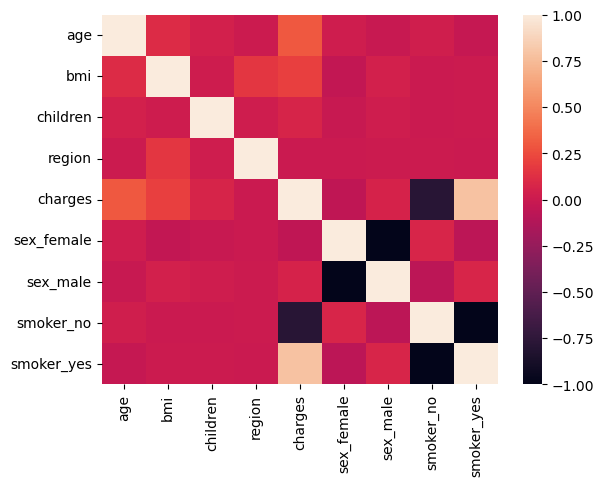

In [39]:
sns.heatmap(df.corr())